# Making a sea surface salinity map using simple mapping packages with the help of data obtained from online sources

## About this Notebook
This notebook is a template that has uses functions that have been defined beforehand to render the necessary output and plot the maps.

These functions are called at their appropriate locations, to make the notebook run successfully. The user is not expected to make changes to the notebook unless and until the source code has been remapped to suit the needs of the user.

In [1]:
from src.Dependencies import *
from src.project_function import *

In [2]:
display_markdown(proj_documentation(), raw=True)


    
This markdown function returns a brief overview of the project and the obejective it tries to achieve.

This notebook is programmed to create a pair of maps for the month of April, for two years that are 100 years apart (1922 and 2022). It has been designed in such a way that the user can specify which ocean they would like the map to be centered about.

The notebook is fairly generalized and user friendly, with appropriate instructions and details provided prior to running the cells. The maps are plotted using inbuilt packages such as matplotlib and Cartopy, and the data is extracted using the iris module. The salinity data is obtained from the EN4 datasets of the Met Office - Hadley Center.

# The Code

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Loading the Data
The next cell calls the 'load_datasets()' function defined in 'project_functions', and assigns it to the variables that will be further used in plotting the map

In [4]:
data_salinity, gridlons1, gridlons2, gridlats1, gridlats2  = load_datasets('Datasets/EN.4.2.2.f.analysis.c14.202104.nc', 'Datasets/EN.4.2.2.f.analysis.c14.192204.nc')

## Mapmaker
The next set of codes allows the user to choose one the three oceans (Indian, Pacific, and Atlantic) that can be represented in a normal map projection without any orthographic adjustments. 

### Selecting the Ocean - 
Using the function that is defined, the user is allowed to type in the Ocean that they wish their plot to be centred about. If the user wishes to customize thier map differently then they must make sure that they add the location and it's central longitude to the dictionary `ocean_centre`.

### Assigning the longitude -
Once the desired ocean has been typed into the input box, it is used by the subsequent code to check if the input falls under the defined dictionary of oceans, and upon confirming the same, the respective longitude value is saved to the `map_centre` variable

In [5]:
selected_ocean = ocean_selector()

choose your ocean: Pacific


In [6]:
map_centre = central_lon(selected_ocean)

### Plotting the map
The final step in the notebook is to use the values obtained so far to plot the desired map using the `Cartopy` and `Matplotlib` packages, which are the easy, already existing packages that can be used to plot various maps.

Two figures are expected, each showing the sea surface salinity for the years 2021 and 1922 respectively.
The figures are appropriately titled, and a color bar showing the legend of the coloring used to describe the map is also used.

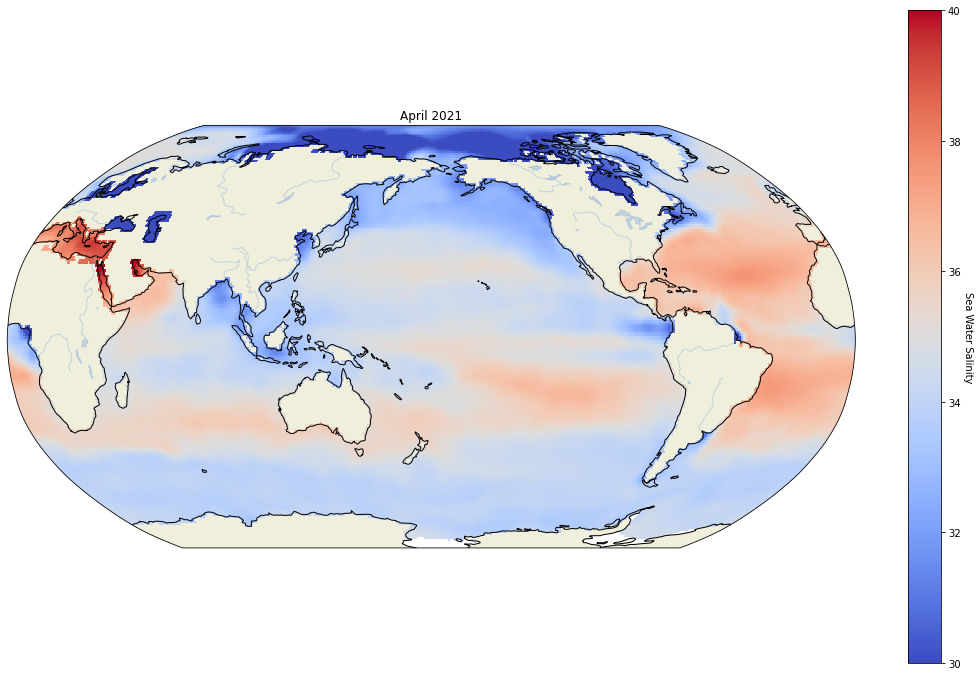

<Figure size 432x288 with 0 Axes>

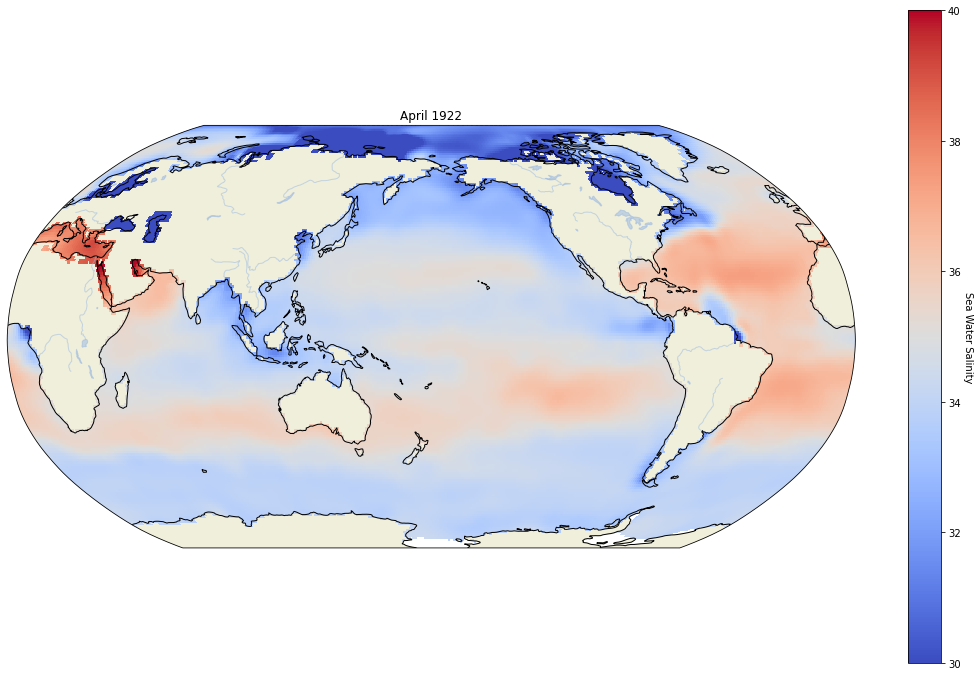

<Figure size 432x288 with 0 Axes>

In [7]:
fig1 = plt.figure(figsize=(19, 12))
ax = plt.axes(projection = ccrs.Robinson(central_longitude = map_centre))
plt.pcolormesh(gridlons1, gridlats1, data_salinity[0], transform = ccrs.PlateCarree(), cmap = 'coolwarm')
cbar = plt.colorbar()
plt.clim(30, 40)
cbar.set_label('Sea Water Salinity', rotation=270,labelpad=12)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS, alpha=0.5)
ax.set_title('April 2021')
plt.show()
plt.savefig('Sea_Surface_Salinity_April_2021')


fig2 =  plt.figure(figsize=(19, 12))
# ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude = -158))
ax = plt.axes(projection=ccrs.Robinson(central_longitude = map_centre))
plt.pcolormesh(gridlons2, gridlats2, data_salinity[1], transform = ccrs.PlateCarree(), cmap = 'coolwarm')
cbar = plt.colorbar()
plt.clim(30, 40)
cbar.set_label('Sea Water Salinity', rotation=270,labelpad=12)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS, alpha=0.5)
ax.set_title('April 1922')
plt.show()
plt.savefig('Sea_Surface_Salinity_April_1922')